# Probability distributions, randomness, and sampling


A probability distribution is a description of a means for generating random values.  The probability distribution specifies what values can be observed (the *sample space*), and how likely it is that each specific value is observed (the *probabilities*).  A simple example is a toss of a fair coin, where the sample space is {head, tail} and the corresponding probabilities are 1/2, 1/2.

There are many "named" probability distributions such as the Normal, exponential, and Poisson distributions. We will illustrate a few of these distributions below.

In statistics, probability distributions are used to define the unknown *population* of interest, from which we observe a *sample* of data from which we learn about the population.  This process of "sampling" is one of the fundamental issues that is considered by most statistical procedures.

Many statistical procedures are based on idealized infinite populations (sometimes called *superpopulations*).  For example, if we repeatedly measure the moisture content of a soil sample, we will obtain a slightly different value each time due to various inconsistencies in the measurement process.  We might decide to treat these values as following a normal distribution, centered at the true (unknown) soil moisture concentration, with a dispersion (standard deviation) that reflects the precision of the measurement process.  Since a sample of one observation from a normal distribution can produce any real number, this is an infinite population.

When working with infinite populations, it is oftent useful to talk about an *independent and identically distributed* sample, or an *IID* sample.  This is a collection of random values that follow the given distribution, which are independent of each other (we will discuss independence later in the course, but roughly speaking it means that no observation in the sample contains information that can be used to predict the value of another observation in the sample).

Some statistical procedures take a *finite population* perspective, in which the population of interest is seen as a finite collection of unknown values, and we observe a *simple random sample* from this finite population.

In this notebook we will consider sampling from both idealized infinite populations and finite populations.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Generating random values from a distribution

In practice we usually observe our data by making observations in the natural world, and then we analyze the data by fitting probability models to it.  Sometimes it is useful to generate a sample of data from a given distribution on a computer.  Since computers are inherently deterministic devices, it is not obvious how to do this.  We won't go into the details on this point here, but it turns out to be possible to construct *pseudo-random* sequences that behave like samples from a given distribution, although the values themselves are actually deterministic.

Below we illustrate how to generate one observation, or an IID sample, from a few probability distributions.

A *uniform* distribution on an interval $[a, b]$ is one in which any value in the interval is equally likely to be observed.  Below we generate first one observation, then a set of 10 IID observations from a uniform distribution on the interval $[25, 50]$.

In [2]:
np.random.uniform(25,50)

29.444634958470786

In [3]:
np.random.uniform(25, 50, 10)

array([40.090725  , 26.95946953, 47.19567323, 28.88938605, 35.43029132,
       48.2192978 , 47.10617679, 48.70493351, 29.329083  , 45.10028356])

A *normal* distribution (also called a *Gaussian* distribution) is a distribution on the real number line with a "bell shaped" density function.  This means that there is a single "central value" (the mean), and observations are quite strongly concentrated around this value.  The dispersion of these values is determined by a standard deviation parameter $\sigma$.  In a normal distribution, about 95% of the observations will fall within $2\sigma$ of the mean.

Below we generate a single observation from a normal distribution with mean zero and standard deviation equal to 1 (a *standard normal distribution*), then we generate a single observation from a normal distribution with mean 5 and standard deviation 2, and then we generate an IID sample of 10 observations from a standard normal distribution.

In [4]:
mu = 0
sigma = 1
np.random.normal(mu, sigma)

-0.3609635978049482

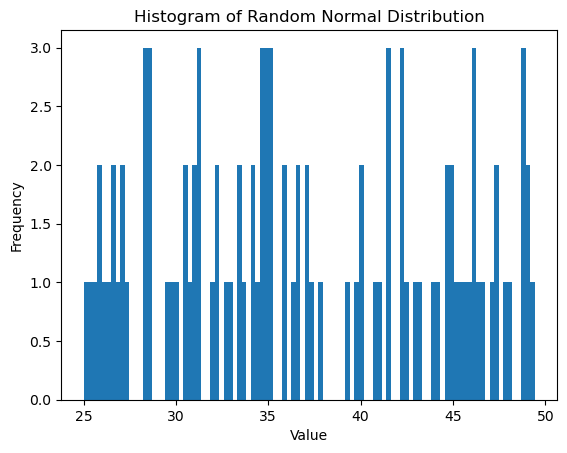

In [17]:
mu = 5
sigma = 2
# Generate the random uniform distribution
data = np.random.uniform(25, 50, 100)

# Create the histogram
plt.hist(data, bins=100)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Normal Distribution')

# Show the histogram
plt.show()

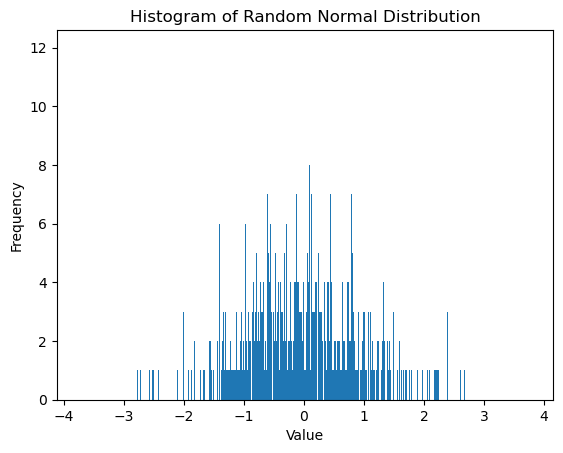

In [13]:
# Generate the random normal distribution
data = np.random.normal(mu, sigma, 15000)

# Create the histogram
plt.hist(data, bins=15000)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Normal Distribution')

# Show the histogram
plt.show()

## Random sampling from a finite population

Now suppose we have a finite population, and we have a list of the sample space (i.e. we know all possible elements that may be sampled).  A "simple random sample" (SRS) of size $m$ is one in which all possible subsets of size $m$ can be observed.  Since a simple random sample cannot include the same observation two times, this is also sometimes called "sampling without replacement".

As a simple example, the following creates a list containing the 26 letters of the latin alphabet.

In [18]:
import string
x = [_ for _ in string.ascii_lowercase]
print(x)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


We can now generate several simple random samples of size 5 from this distribution:

In [8]:
# the code initializes a random number generator using the default_rng() function 
# with a seed value of 12345. The returned Generator object can then be used to generate random numbers.
# So, the code is essentially selecting 5 random elements from the x array without replacement, 
# meaning that each selected element will be unique and won't be selected again in subsequent selections.
rng = np.random.default_rng(12345)
for _ in range(5):
    print(rng.choice(x, 5, replace=False))

['p' 'f' 'z' 's' 'h']
['h' 'p' 'o' 'i' 't']
['v' 'n' 'g' 'q' 'x']
['g' 'b' 'c' 'x' 'k']
['s' 'f' 'z' 'q' 'c']
